# Import data 

In [0]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization

In [3]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
%%time
X_df = pd.read_csv("drive/My Drive/para_comb_20p_sample.csv",header=None)
y_df = pd.read_csv("drive/My Drive/voltages_AP_30sek_sample.csv",header=None)

CPU times: user 39.6 s, sys: 4.23 s, total: 43.8 s
Wall time: 1min 25s


In [0]:
X = X_df.values
y = y_df.values

In [0]:
names = ['Cm','gL','gNa','EL','ENa','EK','gc','gkdr','gAHP','gC','gCa','ECa','p']
X_df.columns = names

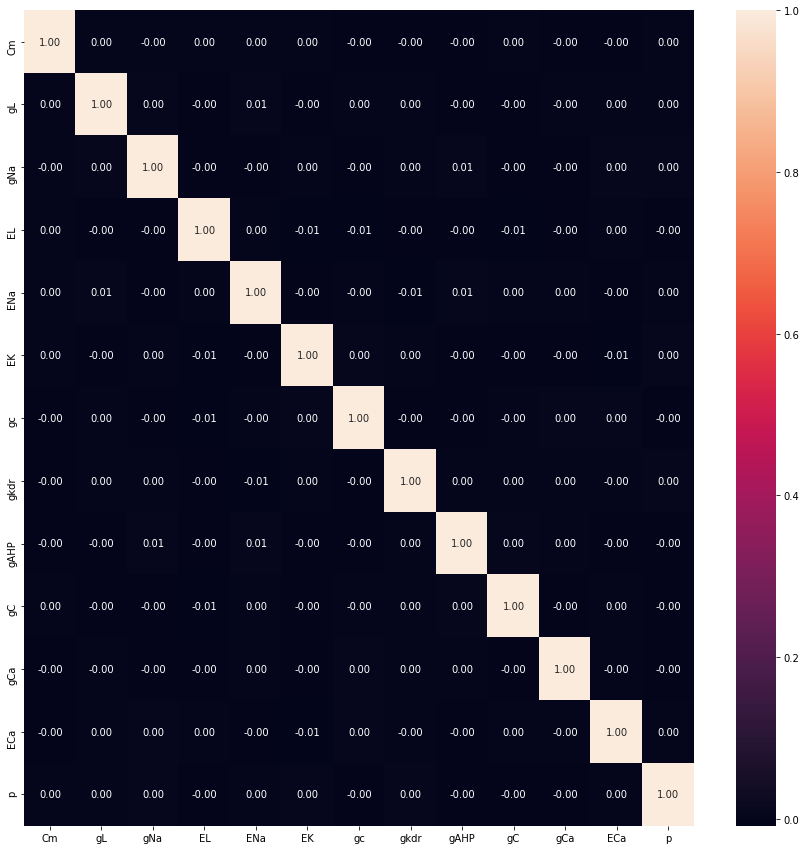

In [10]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(X_df.corr(), annot=True, fmt=".2f")
plt.savefig("drive/My Drive/Figures/Appendix/correlation_PR")

In [0]:
from copy import copy
def sonames(names):
  all_names = copy(names)
  for i,name in enumerate(names):
    all_names.extend([name0+'^2' if name0=='Cm' else name+'*'+name0 for name0 in names[i:]])
  return all_names

snames = sonames(names)



# Import matlab structures

In [0]:
dir_path = "drive/My Drive/MatlabResults/RPclassical/"

In [13]:
!ls drive/My\ Drive/MatlabResults/RPclassical

global_PLSR_training.mat  local_PLSR_training.mat  PLSR_scores.mat


In [0]:
from scipy import io
global_training = io.loadmat(dir_path+'global_PLSR_training.mat')
local_training =  io.loadmat(dir_path+'local_PLSR_training.mat')
PLSR_scores =  io.loadmat(dir_path+'PLSR_scores.mat')

In [0]:
gt_struct = global_training['global_train_model']
lt_struct = local_training['local_train_model']
sc_struct = PLSR_scores['train_model_ls']



In [0]:
gt_val = gt_struct[0,0]
lt_val = lt_struct[0,0]
sc_val = sc_struct[0,0]

In [0]:
LX = sc_val['LX']
SX = sc_val['SX']
LY = sc_val['LY']
SY = sc_val['SY']
W = sc_val['W']
LXgr = sc_val['LXgr']
SXgr = sc_val['SXgr']
LYgr = sc_val['LYgr']
SYgr = sc_val['SYgr']
Wgr = sc_val['Wgr']

R2 = gt_val['R2']
B = gt_val['B']
options = gt_val['options']
tf = gt_val['tf']
MSE = gt_val['MSE']
RMSEP = gt_val['RMSEP']
pctvar = gt_val['pctvar']
Ypred = gt_val['Ypred']
optPCs = gt_val['optPCs']

cluster_centers = lt_val['cluster_centers']
Bgr = lt_val['Bgr']
options = lt_val['options']
tf = lt_val['tf']
clusters = lt_val['clusters']
optPCsgr = lt_val['optPCsgr']
pctvargr = lt_val['pctvargr']
Ypredgr = lt_val['Ypredgr']
MSEgr = lt_val['MSEgr']
RMSEPgr = lt_val['RMSEPgr']

In [0]:
tf = tf.squeeze()
indexes = tf == 1

In [0]:
X_train = X[indexes]
X_test = X[~indexes]
y_train = y[indexes]
y_test = y[~indexes]

# Plots

## Plots of membrane potential clusters

In [0]:
clusters = clusters.squeeze()

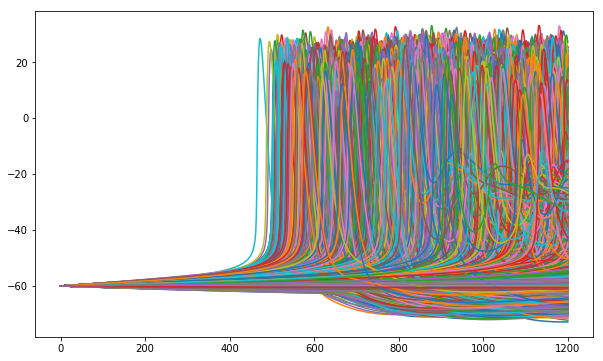

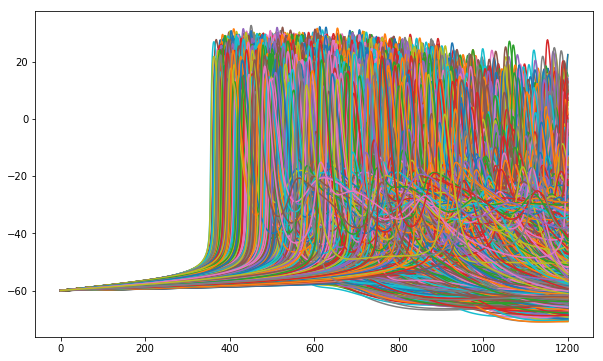

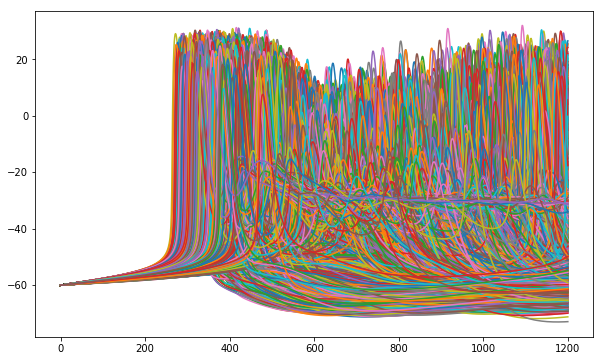

In [21]:
plt.figure(figsize=(10,6))
plt.plot(y_train[clusters==1,:].T);
plt.figure(figsize=(10,6))
plt.plot(y_train[clusters==2,:].T);
plt.figure(figsize=(10,6))
plt.plot(y_train[clusters==3,:].T);

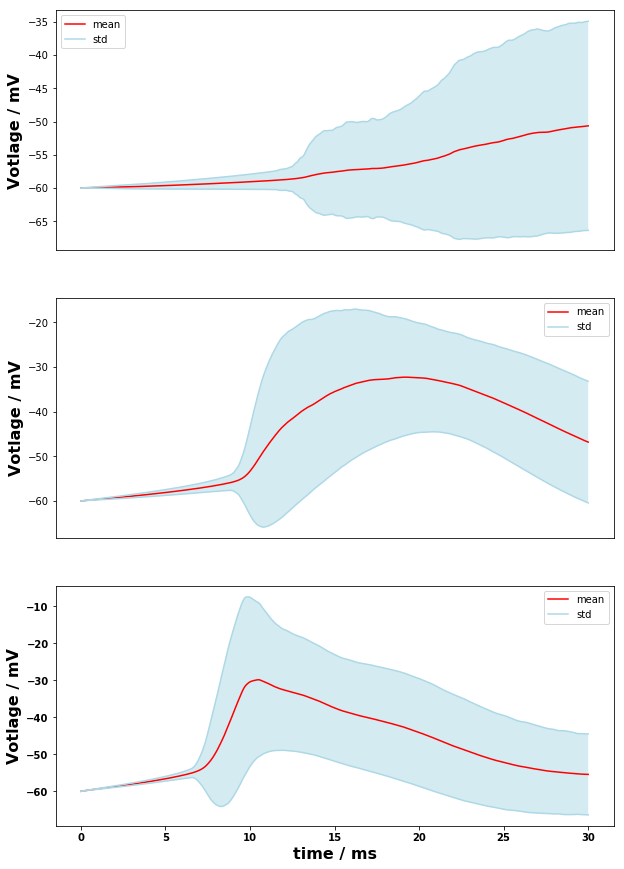

In [22]:
x_axis = np.array([i*0.025 for i in range(1201)])
plt.figure(figsize=(10,15))

for c in np.unique(clusters):
  plt.subplot(3,1,c)
  mu = np.mean(y_train[clusters==c,:],axis=0)
  std = np.std(y_train[clusters==c,:],axis=0)
  upper = mu+std
  lower = mu-std
  
  plt.plot(x_axis,mu,'r',label='mean')
  plt.plot(x_axis,upper,'lightblue',alpha=1,label='std')
  plt.plot(x_axis,lower,'lightblue',alpha=1)
  plt.fill_between(x_axis,lower,upper,facecolor='lightblue',alpha=0.5) ;

  ax = plt.gca()
  for tick in ax.xaxis.get_major_ticks():
      tick.label1.set_fontweight('bold')
  if c == 3:
    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontweight('bold')
  else:
    ax.get_xaxis().set_visible(False)
  plt.xlabel('time / ms', fontsize=16, fontweight='bold')
  plt.ylabel('Votlage / mV', fontsize=16, fontweight='bold')
  plt.legend()

In [0]:
headers = ['B0'] +  snames # Adds b0 to names

# Plots of all regression coefficients

In [24]:
np.shape(Bgr)

(3, 105, 1200)

In [0]:
foo = np.reshape(Bgr,(105,1200*3))

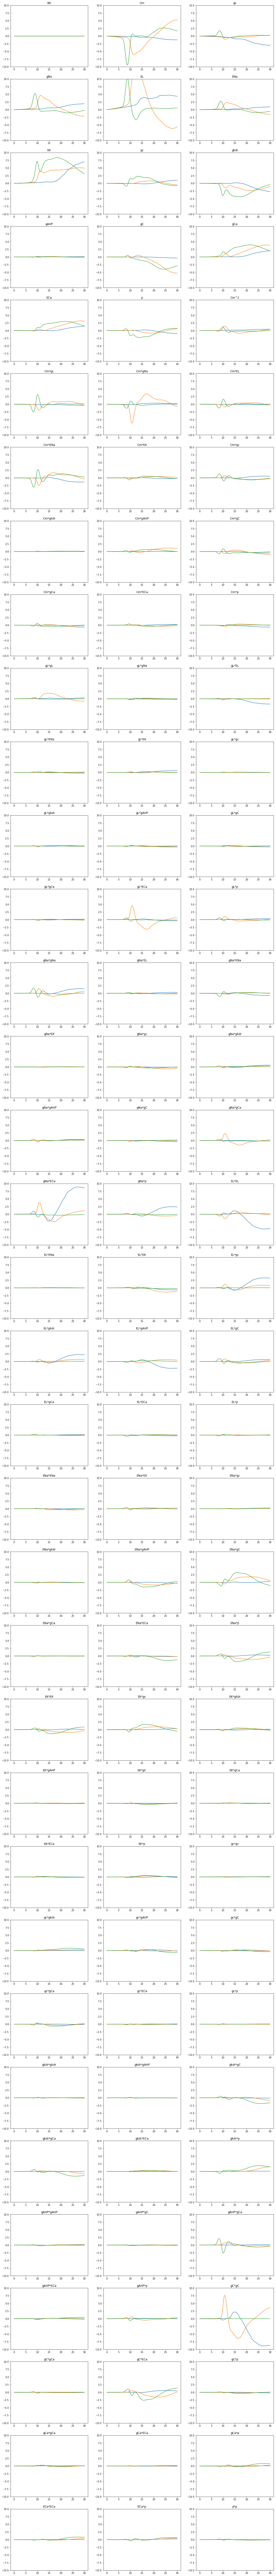

In [26]:
plt.figure(figsize=(20,200))
for i in range(105):
  plt.subplot(35,3,i+1)
  plt.title(headers[i])
  plt.plot(x_axis[1:],Bgr[:,i,:].T);
  plt.ylim(-10,10)

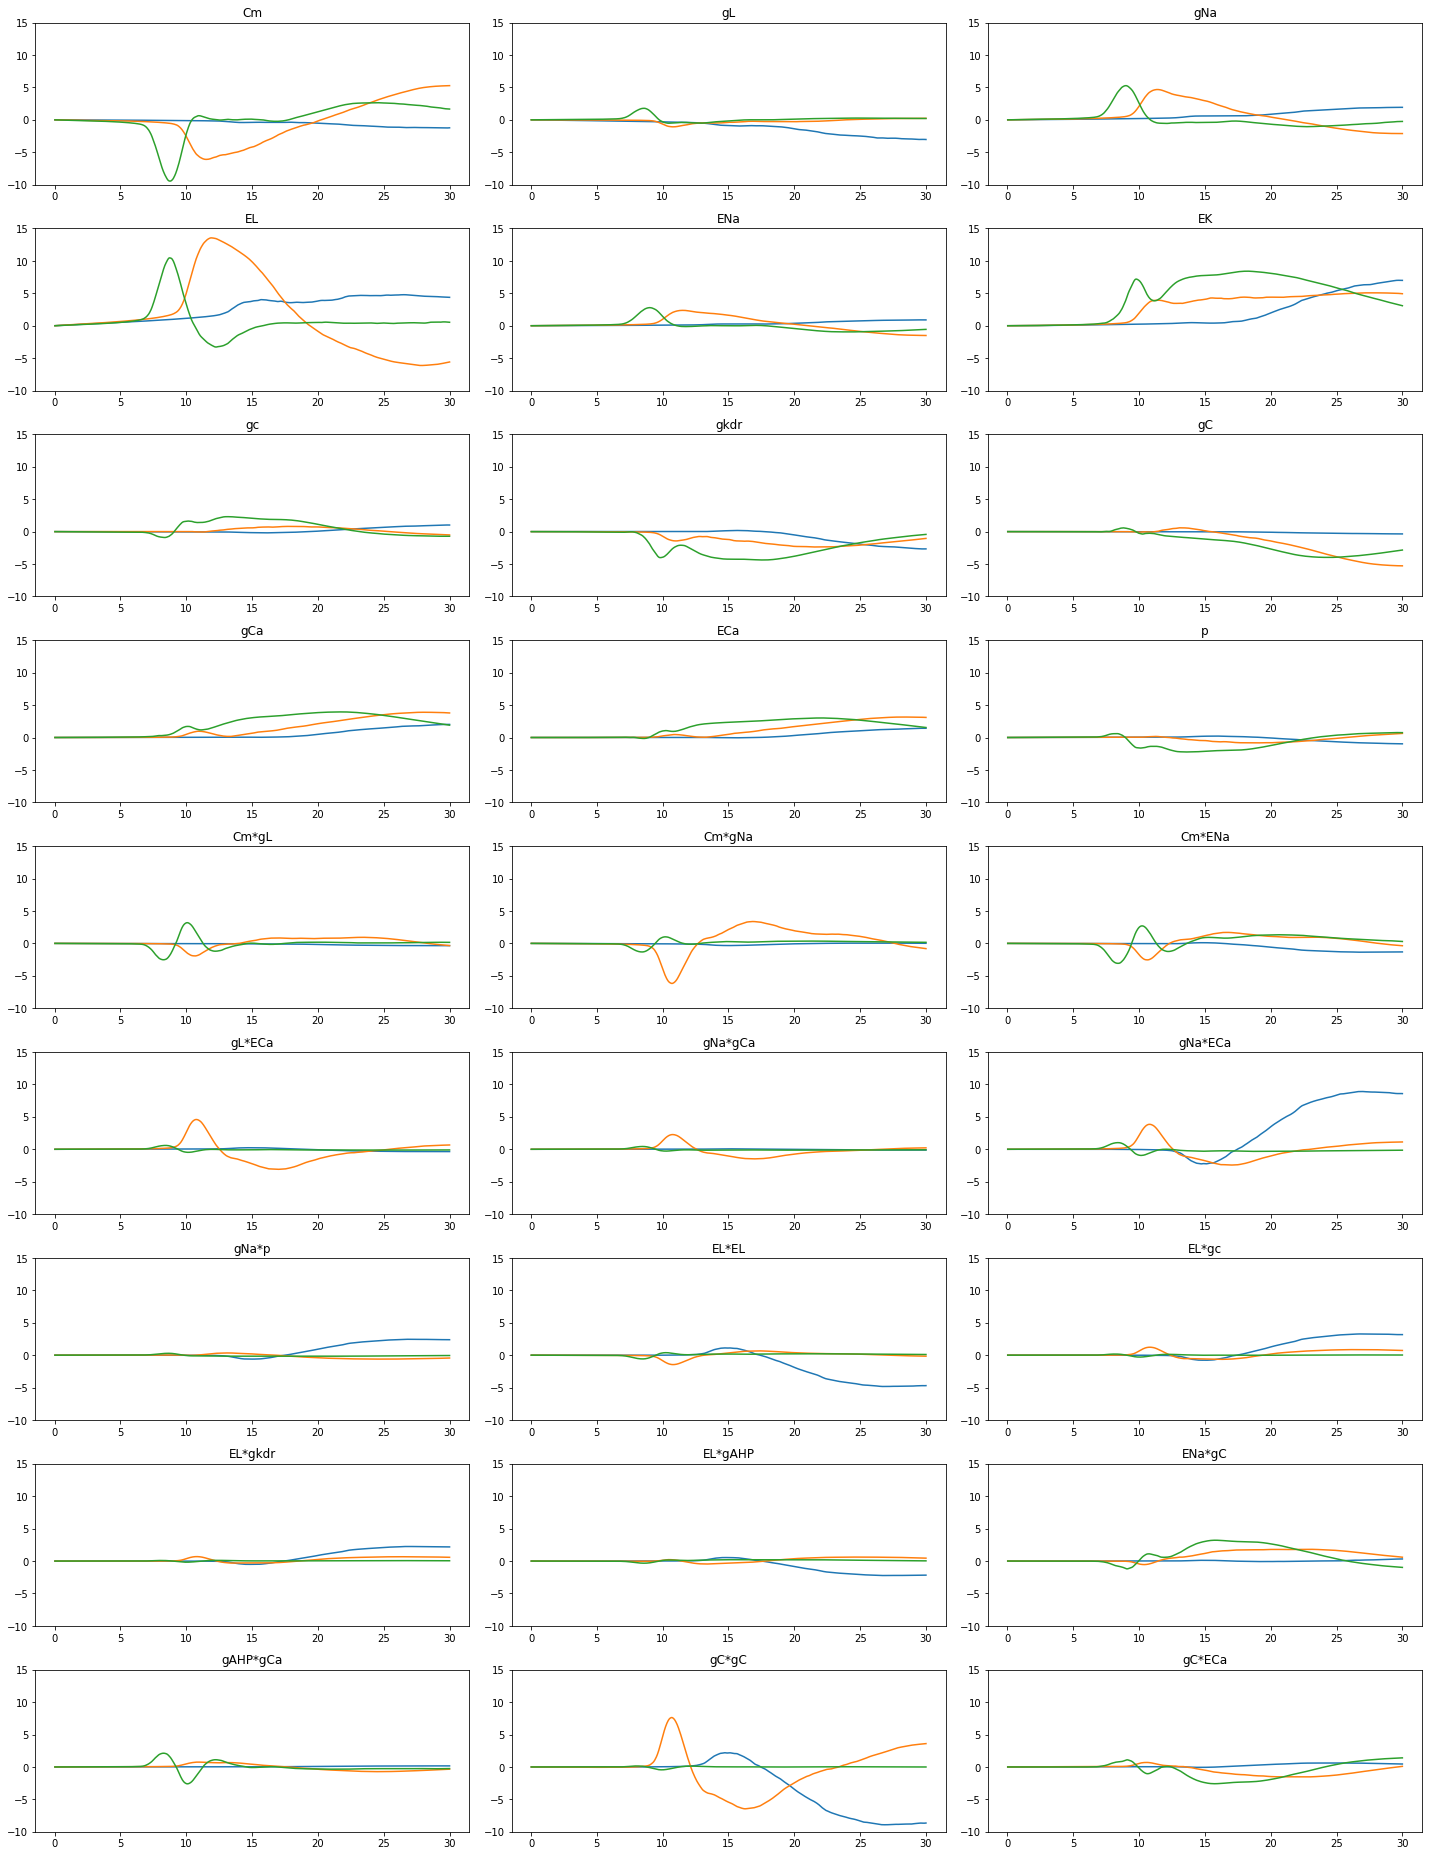

In [27]:
plt.figure(figsize=(20,100))

ctr = 0
for i in range(Bgr.shape[1]):
  
  if np.any(abs(np.squeeze(Bgr[:,i,:])) > 2):
    ctr +=1
    plt.subplot(35,3,ctr)
    plt.title(headers[i])
    plt.plot(x_axis[1:],Bgr[:,i,:].T);
    plt.ylim(-10,15)
plt.tight_layout()


##  Plots of main effect regression coefficients

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationW

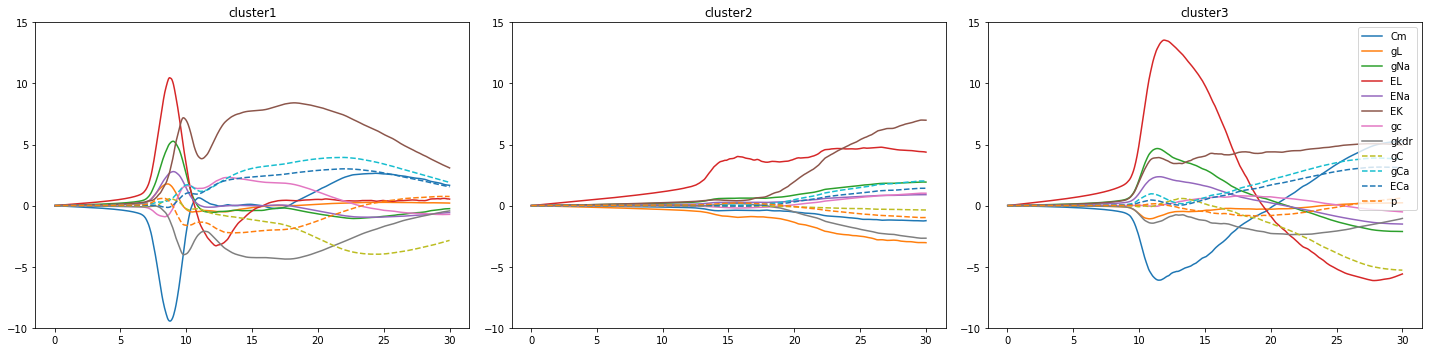

In [28]:
plt.figure(figsize=(20,5))

for i in range(14):
  if np.any(abs(np.squeeze(Bgr[:,i,:])) > 2):
    for cl in range(3):
      plt.subplot(1,3,cl+1)
      plt.title('cluster'+str(cl+1))
      if i < 10:
        plt.plot(x_axis[1:],Bgr[cl-1,i,:].T,'-',label=headers[i]);
      else:
        plt.plot(x_axis[1:],Bgr[cl-1,i,:].T,'--',label=headers[i]);
        
      plt.ylim(-10,15)
plt.legend()
plt.tight_layout()

In [0]:
mu0 = np.mean(y_train,axis=0)
std0= np.std(y_train,axis=0)
upper0 = mu0+std0
lower0 = mu0-std0

mu1 = np.mean(y_train[clusters==1,:],axis=0)
std1= np.std(y_train[clusters==1,:],axis=0)
upper1 = mu1+std1
lower1 = mu1-std1

mu2 = np.mean(y_train[clusters==2,:],axis=0)
std2= np.std(y_train[clusters==2,:],axis=0)
upper2 = mu2+std2
lower2 = mu2-std2

mu3 = np.mean(y_train[clusters==3,:],axis=0)
std3 = np.std(y_train[clusters==3,:],axis=0)
upper3 = mu3+std3
lower3 = mu3-std3

##  Plots of cross- and interaction effect regression coefficients

Next cell finds the fifteen most significant cross- and interaction coefficients

In [30]:
sign_indexes = []
sign_headers = []
for i in range(14,Bgr.shape[1]):
  
  if np.any(abs(np.squeeze(Bgr[:,i,:])) > 2):
    sign_indexes.append(i)
    sign_headers.append(headers[i])
    print(i)
    


15
16
18
37
47
48
49
50
53
54
55
65
92
95
97


In [31]:
sign_headers

['Cm*gL',
 'Cm*gNa',
 'Cm*ENa',
 'gL*ECa',
 'gNa*gCa',
 'gNa*ECa',
 'gNa*p',
 'EL*EL',
 'EL*gc',
 'EL*gkdr',
 'EL*gAHP',
 'ENa*gC',
 'gAHP*gCa',
 'gC*gC',
 'gC*ECa']

In [0]:
import string

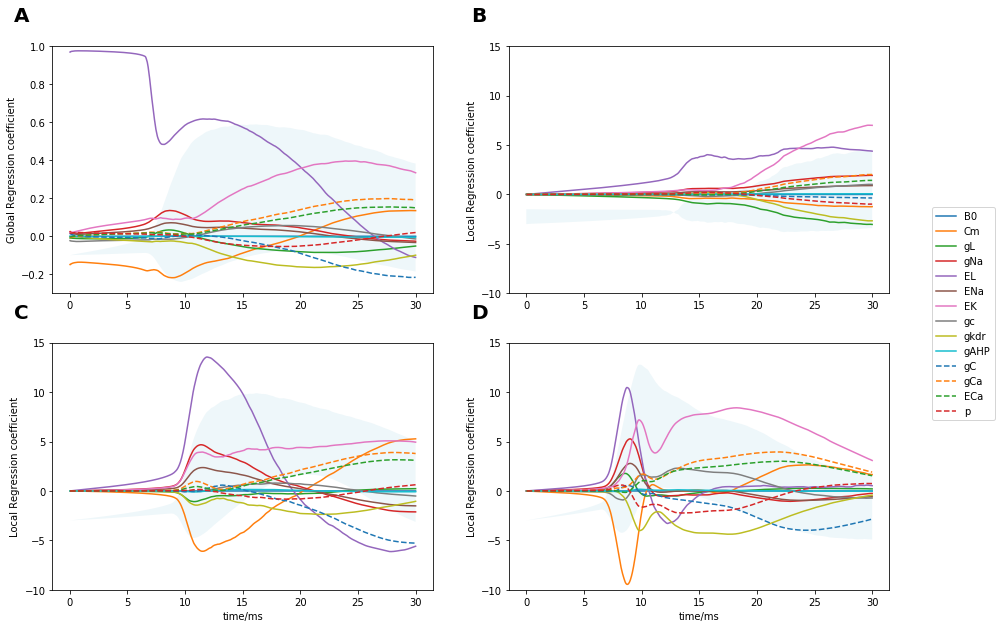

In [33]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.fill_between(x_axis,lower0*0.02+55*0.02,upper0*0.02+55*0.02,facecolor='lightblue',alpha=0.2);
for i in range(14):
  if i < 10:
    plt.plot(x_axis[1:],B[i,:],'-',label=headers[i])
  else:
    plt.plot(x_axis[1:],B[i,:],'--',label=headers[i])
plt.ylim(-0.3,1)
plt.ylabel('Global Regression coefficient')

ax = plt.gca()
ax.text(-0.1, 1.1, string.ascii_uppercase[0], transform=ax.transAxes, 
            size=20, weight='bold')

plt.subplot(2,2,2)

plt.fill_between(x_axis,lower1*0.3+55*0.3,upper1*0.3+50*0.3,facecolor='lightblue',alpha=0.2);
for i in range(14):
  if i < 10:
    plt.plot(x_axis[1:],Bgr[0,i,:],'-',label=headers[i])
  else:
    plt.plot(x_axis[1:],Bgr[0,i,:],'--',label=headers[i])
    
plt.ylim(-10,15)
plt.ylabel('Local Regression coefficient')
ax = plt.gca()
ax.text(-0.1, 1.1, string.ascii_uppercase[1], transform=ax.transAxes, 
            size=20, weight='bold')



plt.subplot(2,2,3)

plt.fill_between(x_axis,lower2*0.3+50*0.3,upper2*0.3+50*0.3,facecolor='lightblue',alpha=0.2);
for i in range(14):
  if i < 10:
    plt.plot(x_axis[1:],Bgr[1,i,:],'-',label=headers[i])
  else:
    plt.plot(x_axis[1:],Bgr[1,i,:],'--',label=headers[i])
    
plt.ylim(-10,15)
plt.ylabel('Local Regression coefficient')
plt.xlabel('time/ms')
ax = plt.gca()
ax.text(-0.1, 1.1, string.ascii_uppercase[2], transform=ax.transAxes, 
            size=20, weight='bold')


plt.subplot(2,2,4)

plt.fill_between(x_axis,lower3*0.3+50*0.3,upper3*0.3+50*0.3,facecolor='lightblue',alpha=0.2);
for i in range(14):
  if i < 10:
    plt.plot(x_axis[1:],Bgr[2,i,:],'-',label=headers[i])
  else:
    plt.plot(x_axis[1:],Bgr[2,i,:],'--',label=headers[i])
    
plt.ylim(-10,15)
plt.ylabel('Local Regression coefficient')
plt.xlabel('time/ms')
ax = plt.gca()
ax.text(-0.1, 1.1, string.ascii_uppercase[3], transform=ax.transAxes, 
            size=20, weight='bold')

plt.figlegend(headers[:14],loc='center right')
plt.savefig("drive/My Drive/Figures/HCPLSR/PRorginal")

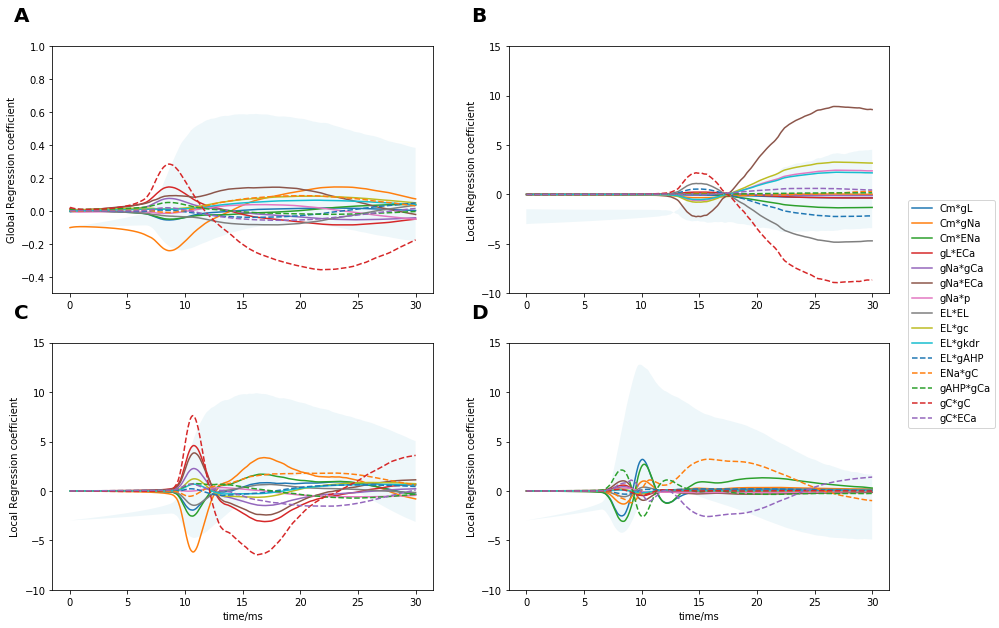

In [34]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.fill_between(x_axis,lower0*0.02+55*0.02,upper0*0.02+55*0.02,facecolor='lightblue',alpha=0.2);
for cnt,i in enumerate(sign_indexes):
  if cnt < 10:
    plt.plot(x_axis[1:],B[i,:],'-',label=headers[i])
  else:
    plt.plot(x_axis[1:],B[i,:],'--',label=headers[i])
plt.ylim(-0.5,1)
plt.ylabel('Global Regression coefficient')
ax = plt.gca()
ax.text(-0.1, 1.1, string.ascii_uppercase[0], transform=ax.transAxes, 
            size=20, weight='bold')


plt.subplot(2,2,2)

plt.fill_between(x_axis,lower1*0.3+55*0.3,upper1*0.3+50*0.3,facecolor='lightblue',alpha=0.2);
for cnt,i in enumerate(sign_indexes):
  if cnt < 10:
    plt.plot(x_axis[1:],Bgr[0,i,:],'-',label=headers[i])
  else:
    plt.plot(x_axis[1:],Bgr[0,i,:],'--',label=headers[i])
    
plt.ylabel('Local Regression coefficient')
plt.ylim(-10,15)
ax = plt.gca()
ax.text(-0.1, 1.1, string.ascii_uppercase[1], transform=ax.transAxes, 
            size=20, weight='bold')


plt.subplot(2,2,3)

plt.fill_between(x_axis,lower2*0.3+50*0.3,upper2*0.3+50*0.3,facecolor='lightblue',alpha=0.2);
for cnt,i in enumerate(sign_indexes):
  if cnt < 10:
    plt.plot(x_axis[1:],Bgr[1,i,:],'-',label=headers[i])
  else:
    plt.plot(x_axis[1:],Bgr[1,i,:],'--',label=headers[i])
    
plt.ylim(-10,15)
plt.ylabel('Local Regression coefficient')
plt.xlabel('time/ms')
ax = plt.gca()
ax.text(-0.1, 1.1, string.ascii_uppercase[2], transform=ax.transAxes, 
            size=20, weight='bold')

plt.subplot(2,2,4)

plt.fill_between(x_axis,lower3*0.3+50*0.3,upper3*0.3+50*0.3,facecolor='lightblue',alpha=0.2);
for cnt,i in enumerate(sign_indexes):
  if cnt < 10:
    plt.plot(x_axis[1:],Bgr[2,i,:],'-',label=headers[i])
  else:
    plt.plot(x_axis[1:],Bgr[2,i,:],'--',label=headers[i])
    

plt.ylim(-10,15)
plt.ylabel('Local Regression coefficient')
plt.xlabel('time/ms')
ax = plt.gca()
ax.text(-0.1, 1.1, string.ascii_uppercase[3], transform=ax.transAxes, 
            size=20, weight='bold')


plt.figlegend(sign_headers,loc='center right')
plt.savefig("drive/My Drive/Figures/HCPLSR/PRinteractionsign2")

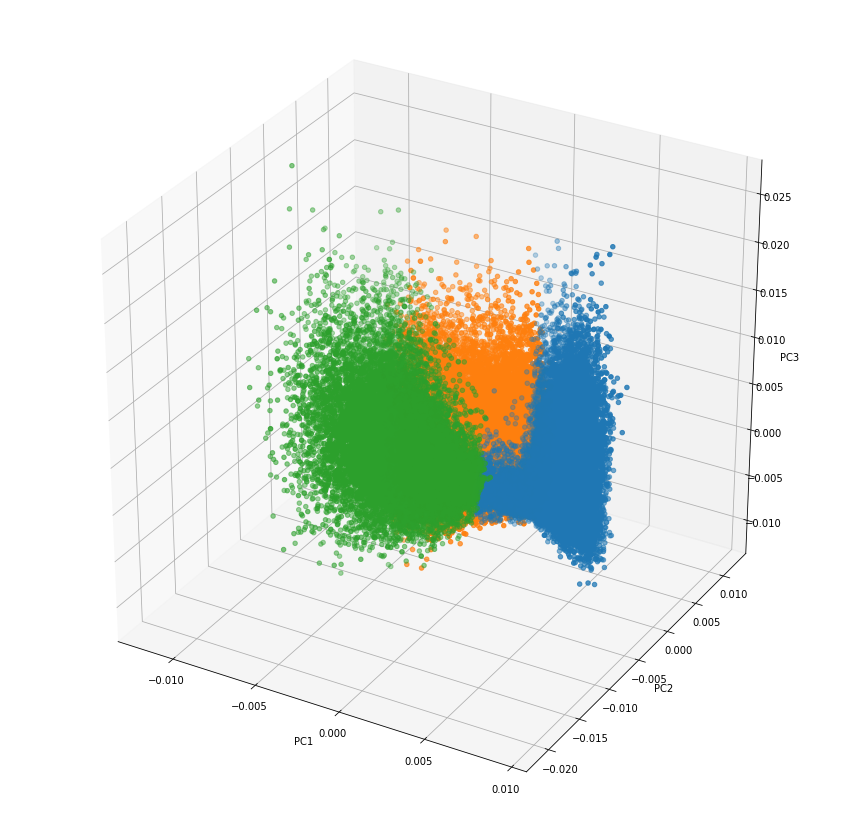

In [35]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import




fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].

for i in range(1,4):
  ind = clusters == i
  ax.scatter(SX[ind,0], SX[ind,1], SX[ind,2])

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.show()

In [0]:
x_axis = np.array([i*0.025 for i in range(1201)])

Text(0, 0.5, 'Voltage / mV')

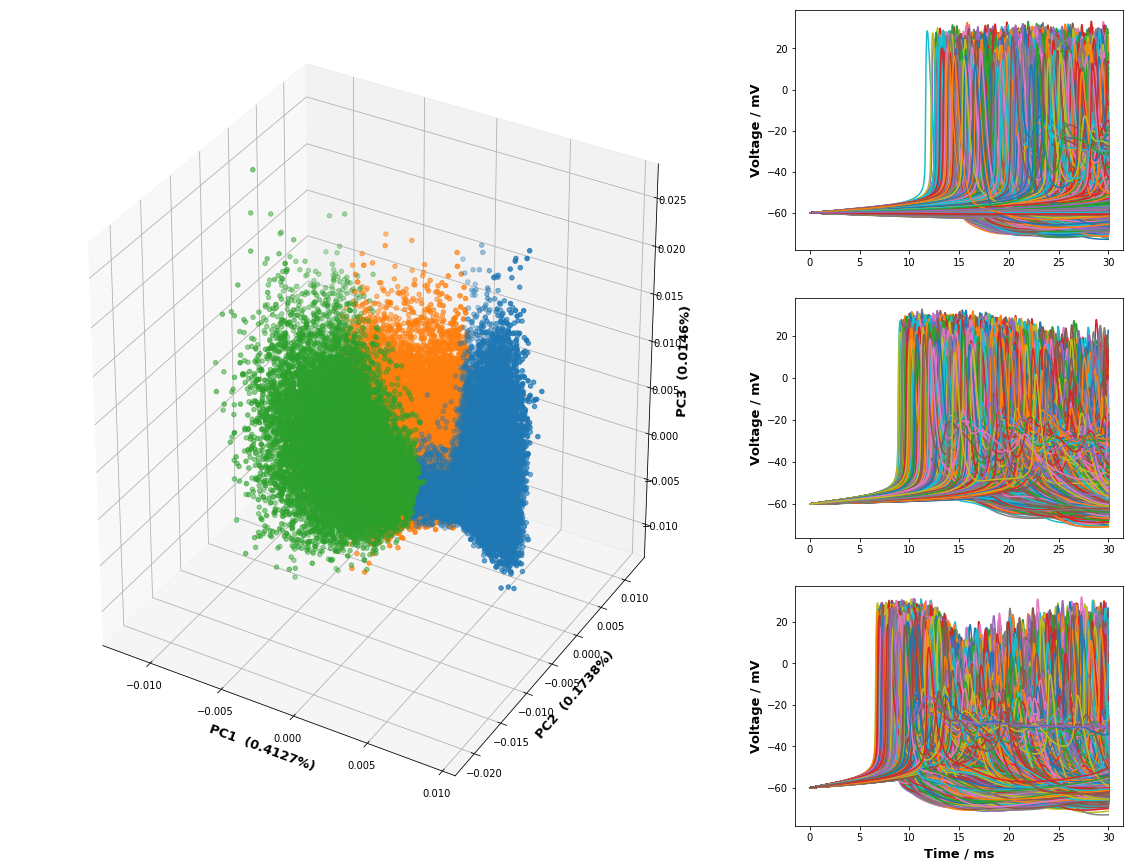

In [37]:
fig = plt.figure(figsize=(20,15))
plt.subplot(2,1,1,projection='3d')
ax = plt.subplot2grid((3, 3), (0, 0), colspan=2,rowspan=3,projection='3d')


# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].

for i in range(1,4):
  ind = clusters == i
  ax.scatter(SX[ind,0], SX[ind,1], SX[ind,2])

ax.set_xlabel('PC1' +'  ('+ str(round(pctvar[1,0],4))+'%)',weight='bold',size=13)
ax.set_ylabel('PC2' +'  ('+ str(round(pctvar[1,1],4))+'%)',weight='bold',size=13)
ax.set_zlabel('PC3' +'  ('+ str(round(pctvar[1,2],4))+'%)',weight='bold',size=13)

plt.subplot(3,3,3)
plt.plot(x_axis,y_train[clusters==1,:].T);
plt.ylabel('Voltage / mV',weight='bold',size=13)
plt.subplot(3,3,6)
plt.plot(x_axis,y_train[clusters==2,:].T);
plt.ylabel('Voltage / mV',weight='bold',size=13)
plt.subplot(3,3,9)
plt.xlabel('Time / ms',weight='bold',size=13)
plt.plot(x_axis,y_train[clusters==3,:].T);
plt.ylabel('Voltage / mV',weight='bold',size=13)
#plt.savefig("drive/My Drive/Figures/HCPLSR/PRclusters")

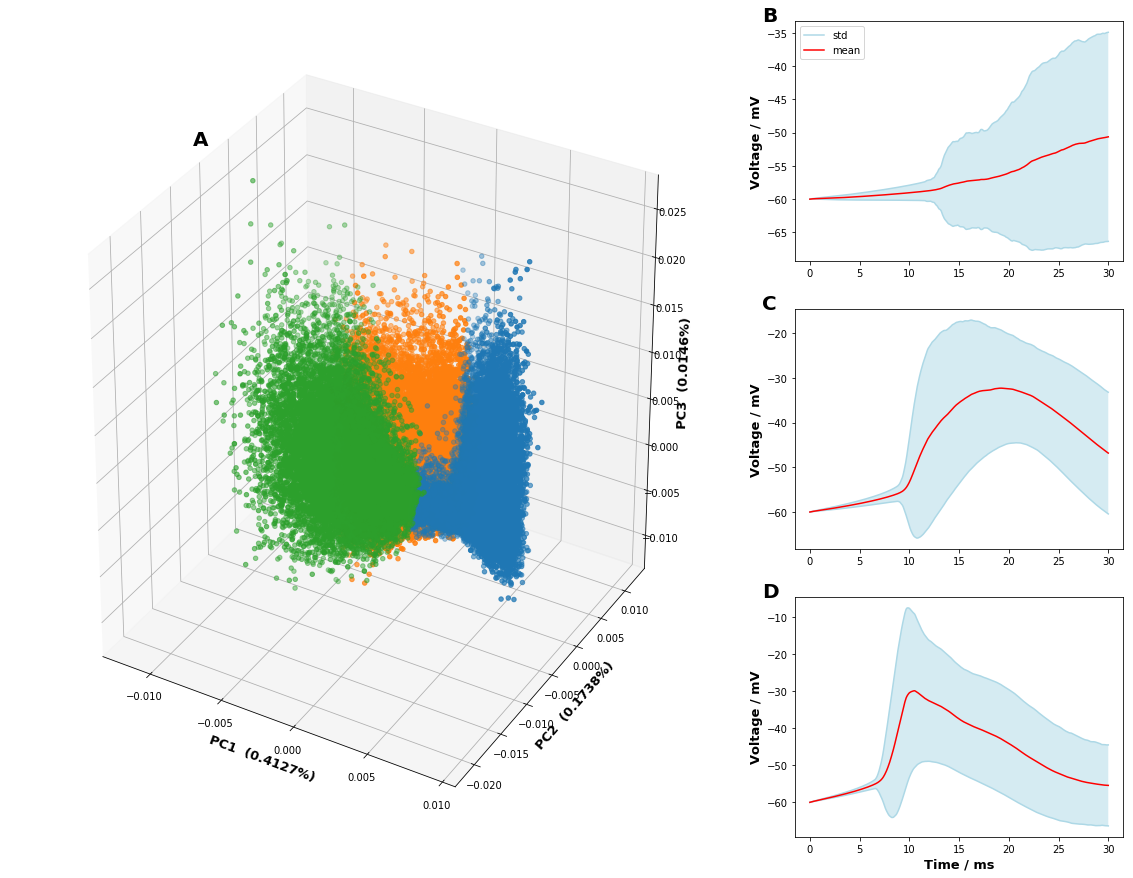

In [38]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import string
fig = plt.figure(figsize=(20,15))
plt.subplot(2,1,1,projection='3d')
ax = plt.subplot2grid((3, 3), (0, 0), colspan=2,rowspan=3,projection='3d')


# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].

for i in range(1,5):
  ind = clusters == i
  ax.scatter(SX[ind,0], SX[ind,1], SX[ind,2])

ax.set_xlabel('PC1' +'  ('+ str(round(pctvar[1,0],4))+'%)',weight='bold',size=13)
ax.set_ylabel('PC2' +'  ('+ str(round(pctvar[1,1],4))+'%)',weight='bold',size=13)
ax.set_zlabel('PC3' +'  ('+ str(round(pctvar[1,2],4))+'%)',weight='bold',size=13)
ax.text(-0.2, 1.1,0.5, string.ascii_uppercase[0], transform=ax.transAxes, 
            size=20, weight='bold')




plt.subplot(3,3,3)
plt.plot(x_axis,upper1,'lightblue',alpha=1,label='std')
plt.plot(x_axis,lower1,'lightblue',alpha=1)
plt.fill_between(x_axis,lower1,upper1,facecolor='lightblue',alpha=0.5) ;
plt.plot(x_axis,mu1,'r',label='mean')
plt.ylabel('Voltage / mV',weight='bold',size=13)
plt.legend()
ax = plt.gca()
ax.text(-0.1, 1., string.ascii_uppercase[1], transform=ax.transAxes, 
            size=20, weight='bold')



plt.subplot(3,3,6)
plt.plot(x_axis,upper2,'lightblue',alpha=1,label='std')
plt.plot(x_axis,lower2,'lightblue',alpha=1)
plt.fill_between(x_axis,lower2,upper2,facecolor='lightblue',alpha=0.5) ;
plt.plot(x_axis,mu2,'r',label='mean')
plt.ylabel('Voltage / mV',weight='bold',size=13)

ax = plt.gca()
ax.text(-0.1, 1., string.ascii_uppercase[2], transform=ax.transAxes, 
            size=20, weight='bold')


plt.subplot(3,3,9)
plt.xlabel('Time / ms',weight='bold',size=13)
plt.plot(x_axis,upper3,'lightblue',alpha=1,label='std')
plt.plot(x_axis,lower3,'lightblue',alpha=1)
plt.fill_between(x_axis,lower3,upper3,facecolor='lightblue',alpha=0.5) ;
plt.plot(x_axis,mu3,'r',label='mean')
plt.ylabel('Voltage / mV',weight='bold',size=13)
ax = plt.gca()
ax.text(-0.1, 1., string.ascii_uppercase[3], transform=ax.transAxes, 
            size=20, weight='bold')

plt.savefig("drive/My Drive/Figures/HCPLSR/PRclusters")

In [0]:

plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.plot(x_axis,y.T);
plt.ylabel('Voltage / mV')
plt.xlabel('time / ms')
ax = plt.gca()
ax.text(-0.1, 1., string.ascii_uppercase[0], transform=ax.transAxes, 
            size=20, weight='bold')


plt.subplot(1,2,2)
plt.plot(x_axis,upper0,'lightblue',alpha=1,label='std')
plt.plot(x_axis,lower0,'lightblue',alpha=1)
plt.fill_between(x_axis,lower0,upper0,facecolor='lightblue',alpha=0.5) ;
plt.plot(x_axis,mu0,'r',label='mean')
plt.ylabel('Voltage / mV')
plt.xlabel('time / ms')
plt.legend()
ax = plt.gca()
ax.text(-0.1, 1., string.ascii_uppercase[1], transform=ax.transAxes, 
            size=20, weight='bold')

#plt.savefig("drive/My Drive/Figures/HCPLSR/PRDatagen")